# PCA dimensionality reduction of a UMCG Short-axis image

In [1]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

img1 = mpimg.imread('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/data_jpg/umcg_img_example/output-slice007.jpg')

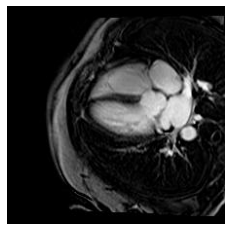

In [2]:
plt.axis('off')
plt.imshow(img1)
plt.show()
# plt.savefig('myfig.png') # To save the figure

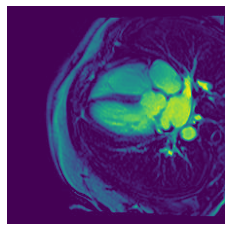

In [3]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray)
plt.show()

In [41]:
print(gray.shape)
print()

(224, 224)



### Formatting size for PCA
image composed of 224 rows, 224*3 (or 672) pixels each

Using the gray scale image after the transformed image using color (or the 3 factor) failed to yield good results

In [37]:
# Trying different N of components to check capacity to explain variance
ipca = PCA(100).fit(gray)
img_c = ipca.transform(gray) # This applies dimensionality reduction to the image without fitting data
# While ipca.fit_transform(X[,y]) would fit the model and apply dimensionality reduction on X

print('Image shape:', img_c.shape)
print('Variance ratio for 100 components:', np.sum(ipca.explained_variance_ratio_), '%')

'''
The explained variance ratio is the percentage of variance that is attributed by each of the selected components.
Ideally, you would choose the number of components to include in your model by adding the explained variance ratio
of each component until you reach a total of around 0.8 or 80% to avoid overfitting.
'''
print()

Image shape: (224, 100)
Variance ratio for 100 components: 0.999822838941079 %



## Trying different number of components and the corresponding variance ratio

| Components | Variance explained (%) |
:---:| :---: |
| **100** | 0.999822 | 
| **82** | 0.999384 | 
| **64** | 0.998003 | 
| **50** | 0.995144 | 
| **20** | 0.964721 | 
| **15** | 0.946528 | 
| **10** | 0.915156 | 
| **5** | 0.842562 | 
| **2** | 0.745147 |
| **1** | 0.689508 |

(224, 224)
(224, 224)


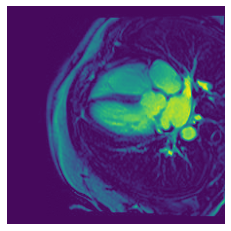

In [38]:
# Inversing the transform of the PCA output and reshape for visualization
temp = ipca.inverse_transform(img_c)
print(temp.shape)

#reshaping
temp = np.reshape(temp, (224,224))

print(temp.shape)

plt.axis('off')
plt.imshow(temp)
plt.savefig('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_100.png')

In [2]:
import ipywidgets as widgets
import IPython.display as display

## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_1.png', 'rb').read()
img2 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_2.png', 'rb').read()
img3 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_5.png', 'rb').read()
img4 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_10.png', 'rb').read()
img5 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_15.png', 'rb').read()
img6 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_20.png', 'rb').read()
img7 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_50.png', 'rb').read()
img8 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_64.png', 'rb').read()
img9 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_82.png', 'rb').read()
img10 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_img_umcg/variance_100.png', 'rb').read()


## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png', width="300", height="400")
wi2 = widgets.Image(value=img2, format='png', width=300, height=400)
wi3 = widgets.Image(value=img3, format='png', width=300, height=400)
wi4 = widgets.Image(value=img4, format='png', width=300, height=400)
wi5 = widgets.Image(value=img5, format='png', width=300, height=400)
wi6 = widgets.Image(value=img6, format='png', width=300, height=400)
wi7 = widgets.Image(value=img7, format='png', width=300, height=400)
wi8 = widgets.Image(value=img8, format='png', width=300, height=400)
wi9 = widgets.Image(value=img9, format='png', width=300, height=400)
wi10 = widgets.Image(value=img10, format='png', width=300, height=400)


## Side by side thanks to HBox widgets
sidebyside1 = widgets.HBox([wi1, wi2])
sidebyside2 = widgets.HBox([wi3, wi4])
sidebyside3 = widgets.HBox([wi5, wi6])
sidebyside4 = widgets.HBox([wi7, wi8])
sidebyside5 = widgets.HBox([wi9, wi10])

## Finally, show.
print('a)        Using 1 components:                 Using 2 components:')
print('          (Yielding 68% Var)                  (Yielding 75% Var)')
display.display(sidebyside1)
print('b)        Using 5 components:                 Using 10 components:')
print('          (Yielding 84% Var)                  (Yielding 92% Var)')
display.display(sidebyside2)
print('c)        Using 15 components:                Using 20 components:')
print('          (Yielding 95% Var)                  (Yielding 96% Var)')
display.display(sidebyside3)
print('d)        Using 50 components:                Using 64 components:')
print('          (Yielding 100% Var)                 (Yielding 100% Var)')
display.display(sidebyside4)
print('e)        Using 82 components:                Using 100 components:')
print('          (Yielding 100% Var)                 (Yielding 100% Var)')
display.display(sidebyside5)

a)        Using 1 components:                 Using 2 components:
          (Yielding 68% Var)                  (Yielding 75% Var)


b)        Using 5 components:                 Using 10 components:
          (Yielding 84% Var)                  (Yielding 92% Var)


c)        Using 15 components:                Using 20 components:
          (Yielding 95% Var)                  (Yielding 96% Var)


d)        Using 50 components:                Using 64 components:
          (Yielding 100% Var)                 (Yielding 100% Var)


e)        Using 82 components:                Using 100 components:
          (Yielding 100% Var)                 (Yielding 100% Var)
